In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from clean_data import load_and_clean_data
from preprocess_data import preprocess_data


In [74]:
import Datasets
# Paths to data
properties_2016_path = '../source_code/Datasets/properties_2016.csv'
train_2016_path = '../source_code/Datasets/train_2016_v2.csv'
properties_2017_path = '../source_code/Datasets/properties_2017.csv'
train_2017_path = '../source_code/Datasets/train_2017.csv'

# Load and clean data
df_train = load_and_clean_data(properties_2016_path, train_2016_path, properties_2017_path, train_2017_path)

# Preprocess the data
X_processed, y, preprocessor = preprocess_data(df_train)


In [75]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [61]:
# Initialize the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(10,),  # Number of neurons in each hidden layer
                         activation='relu',           # Activation function
                         solver='adam',               # Optimizer
                         max_iter=100,                # Maximum number of iterations
                         random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(10,), max_iter=100, random_state=42)

In [63]:
# Make predictions
y_pred_train_mlp = mlp_model.predict(X_train)
y_pred_test_mlp = mlp_model.predict(X_test)

# Evaluate the model
mae_train_mlp = mean_absolute_error(y_train, y_pred_train_mlp)
mae_test_mlp = mean_absolute_error(y_test, y_pred_test_mlp)
mse_train_mlp = mean_squared_error(y_train, y_pred_train_mlp)
mse_test_mlp = mean_squared_error(y_test, y_pred_test_mlp)
r2_train_mlp = r2_score(y_train, y_pred_train_mlp)
r2_test_mlp = r2_score(y_test, y_pred_test_mlp)

print(f"Train MAE (MLPRegressor): {mae_train_mlp}")
print(f"Test MAE (MLPRegressor): {mae_test_mlp}")
print(f"Train MSE (MLPRegressor): {mse_train_mlp}")
print(f"Test MSE (MLPRegressor): {mse_test_mlp}")
print(f"Train R2 (MLPRegressor): {r2_train_mlp}")
print(f"Test R2 (MLPRegressor): {r2_test_mlp}")


Train MAE (MLPRegressor): 0.07142374017713718
Test MAE (MLPRegressor): 0.07433065135065642
Train MSE (MLPRegressor): 0.02651372519564335
Test MSE (MLPRegressor): 0.02933887701147406
Train R2 (MLPRegressor): 0.023448351517849297
Test R2 (MLPRegressor): -0.022695445313637208


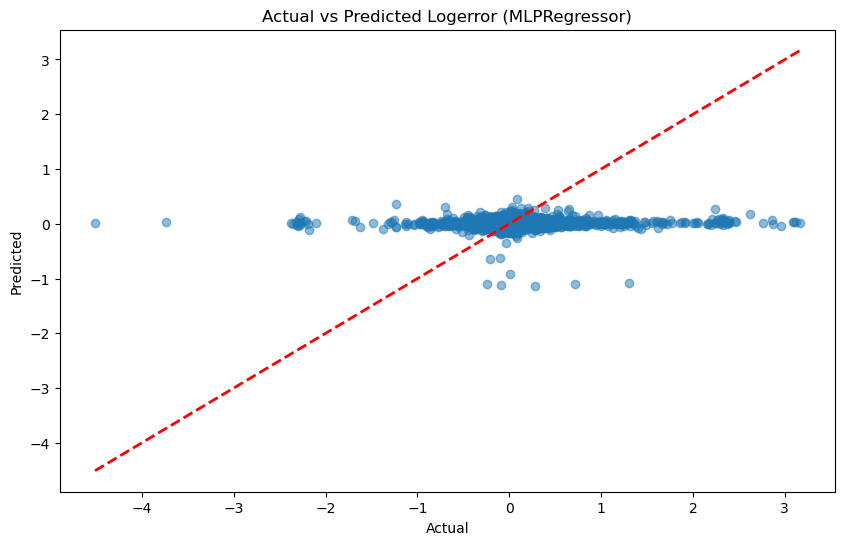

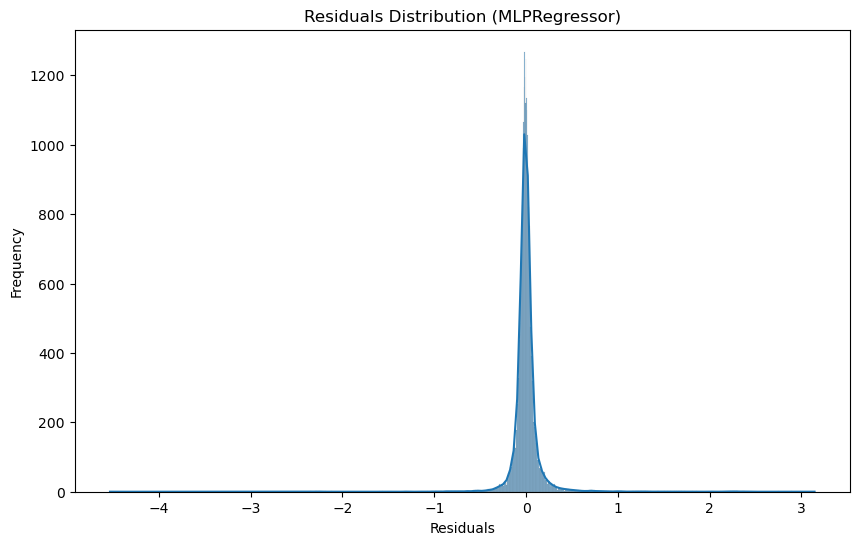

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_mlp, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Logerror (MLPRegressor)')
plt.show()

# Residual plot
residuals = y_test - y_pred_test_mlp
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (MLPRegressor)')
plt.show()


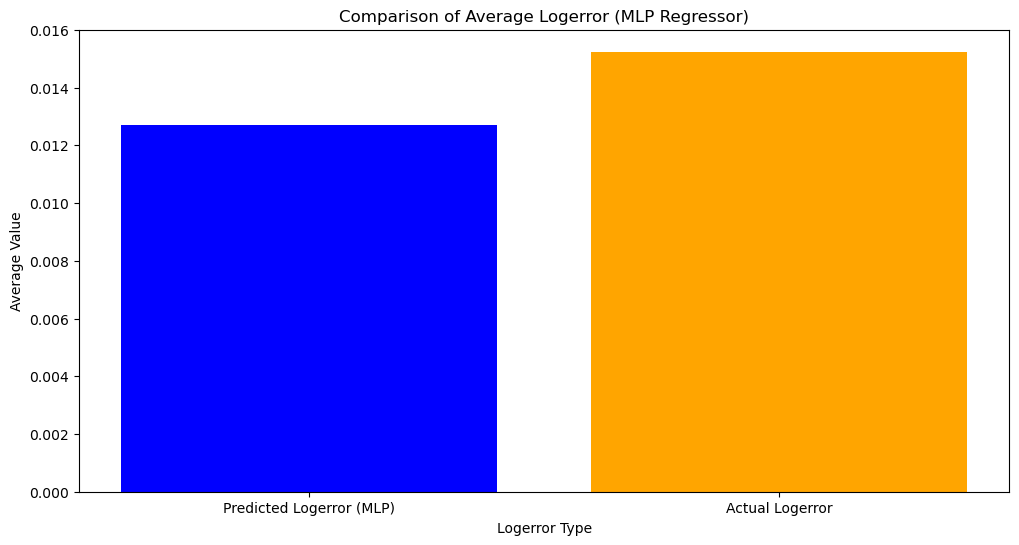

In [66]:
import matplotlib.pyplot as plt

# Assume you have already trained the MLPRegressor and made predictions
# y_pred_test_mlp = mlp.predict(X_test)  # Use this if you haven't predicted yet

# Calculate average logerror for MLPRegressor
avg_predicted_logerror_mlp = y_pred_test_mlp.mean()
avg_actual_logerror = y_test.mean()  # Actual logerror remains the same for all models

# Optional: Plot comparison of average logerror for MLPRegressor
plt.figure(figsize=(12, 6))

# MLP Regressor
plt.bar(['Predicted Logerror (MLP)', 'Actual Logerror'], [avg_predicted_logerror_mlp, avg_actual_logerror], color=['blue', 'orange'])
plt.xlabel('Logerror Type')
plt.ylabel('Average Value')
plt.title('Comparison of Average Logerror (MLP Regressor)')
plt.show()


In [69]:
# Calculate the percentage difference for Ridge and Lasso
percentage_diff = ((avg_predicted_logerror_mlp - avg_actual_logerror) / avg_actual_logerror) * 100

print(f"Percentage Difference in Average Logerror : {percentage_diff:.2f}%")


Percentage Difference in Average Logerror : -16.61%
